# Load data

In [29]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=8,
                                               shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship','truck')


Files already downloaded and verified
Files already downloaded and verified


# Display some data

truck   dog  deer   dog   dog  deer truck   cat


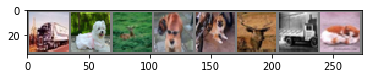

In [43]:
%matplotlib inline

def imshow(img):
    img = img/2 + 0.5 #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    

# get data
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

# Define a Convolutional


In [20]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # in, out, kernel
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    # override the forward function
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# get instance of Net
net = Net()

# Define Loss function and optimier

In [41]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-5)

# Train the network

In [42]:
def train(model, loss_fn, optimizer, num_epoch):
    for epoch in range(num_epoch):
        for i, (x, y) in enumerate(trainloader):
            x, y = Variable(x), Variable(y)
            
            # zero the grad
            optimizer.zero_grad()
            
            # Forward + Backward + update
            score = net(x)
            loss = loss_fn(score, y)
            # Print statistics
            if i%1000 == 0:
                print('Epoch %d, iter %5d, loss %.3f' %(epoch + 1, i, loss.data[0]))
            
            loss.backward()
            optimizer.step
            
            
    print('Finish training')

train(net, loss_fn, optimizer, 2)
    

Epoch 1, iter     0, loss 1.743
Epoch 1, iter  1000, loss 1.174
Epoch 1, iter  2000, loss 1.971
Epoch 1, iter  3000, loss 1.613
Epoch 1, iter  4000, loss 1.502
Epoch 1, iter  5000, loss 0.708
Epoch 1, iter  6000, loss 1.111
Epoch 2, iter     0, loss 1.577
Epoch 2, iter  1000, loss 0.906
Epoch 2, iter  2000, loss 0.822
Epoch 2, iter  3000, loss 1.377
Epoch 2, iter  4000, loss 1.316
Epoch 2, iter  5000, loss 1.018
Epoch 2, iter  6000, loss 0.745
Finish training


# Test the network

('GroundTruth: ', '  cat  ship  ship plane  frog  frog   car  frog')


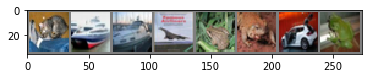

In [44]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [46]:
score = net(Variable(images))
_, predicted = torch.max(score.data, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))

('Predicted: ', '  dog   car plane  ship  bird  frog   car  bird')


In [47]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 47 %


In [48]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 56 %
Accuracy of   car : 73 %
Accuracy of  bird : 40 %
Accuracy of   cat : 12 %
Accuracy of  deer : 12 %
Accuracy of   dog : 54 %
Accuracy of  frog : 60 %
Accuracy of horse : 66 %
Accuracy of  ship : 66 %
Accuracy of truck : 32 %
